In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [6]:
df = pd.read_csv('mnist.csv')

In [8]:
# Prepare input and labels
X = df.drop('label', axis=1).values
y = df['label'].values

In [10]:
# Normalize and reshape
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)  # CNN expects 4D input

In [12]:
# One-hot encode the labels
y_categorical = to_categorical(y, 10)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [16]:
# Build CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [18]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
 # Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [24]:
# Train
history = model.fit(X_train, y_train, batch_size=64, epochs=30, 
                    validation_split=0.1, callbacks=[early_stop, reduce_lr])

Epoch 1/30
473/473 [==============================] - 10s 20ms/step - loss: 0.4356 - accuracy: 0.8681 - val_loss: 0.2182 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - 10s 20ms/step - loss: 0.1555 - accuracy: 0.9524 - val_loss: 0.0525 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - 10s 21ms/step - loss: 0.1173 - accuracy: 0.9640 - val_loss: 0.0548 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 4/30
473/473 [==============================] - 10s 20ms/step - loss: 0.1005 - accuracy: 0.9704 - val_loss: 0.0468 - val_accuracy: 0.9872 - lr: 0.0010
Epoch 5/30
473/473 [==============================] - 10s 21ms/step - loss: 0.0891 - accuracy: 0.9747 - val_loss: 0.0473 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 6/30
473/473 [==============================] - 10s 21ms/step - loss: 0.0814 - accuracy: 0.9755 - val_loss: 0.0403 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 7/30
473/473 [==============================] - 10s 

In [26]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

263/263 [==============================] - 2s 6ms/step - loss: 0.0332 - accuracy: 0.9902
Test Accuracy: 0.9902


In [28]:
# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

263/263 [==============================] - 2s 5ms/step


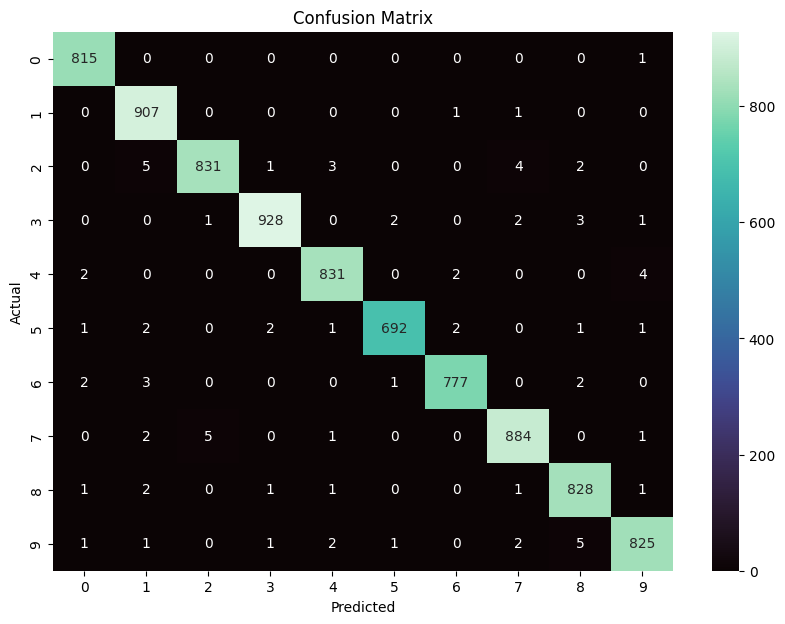

In [30]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


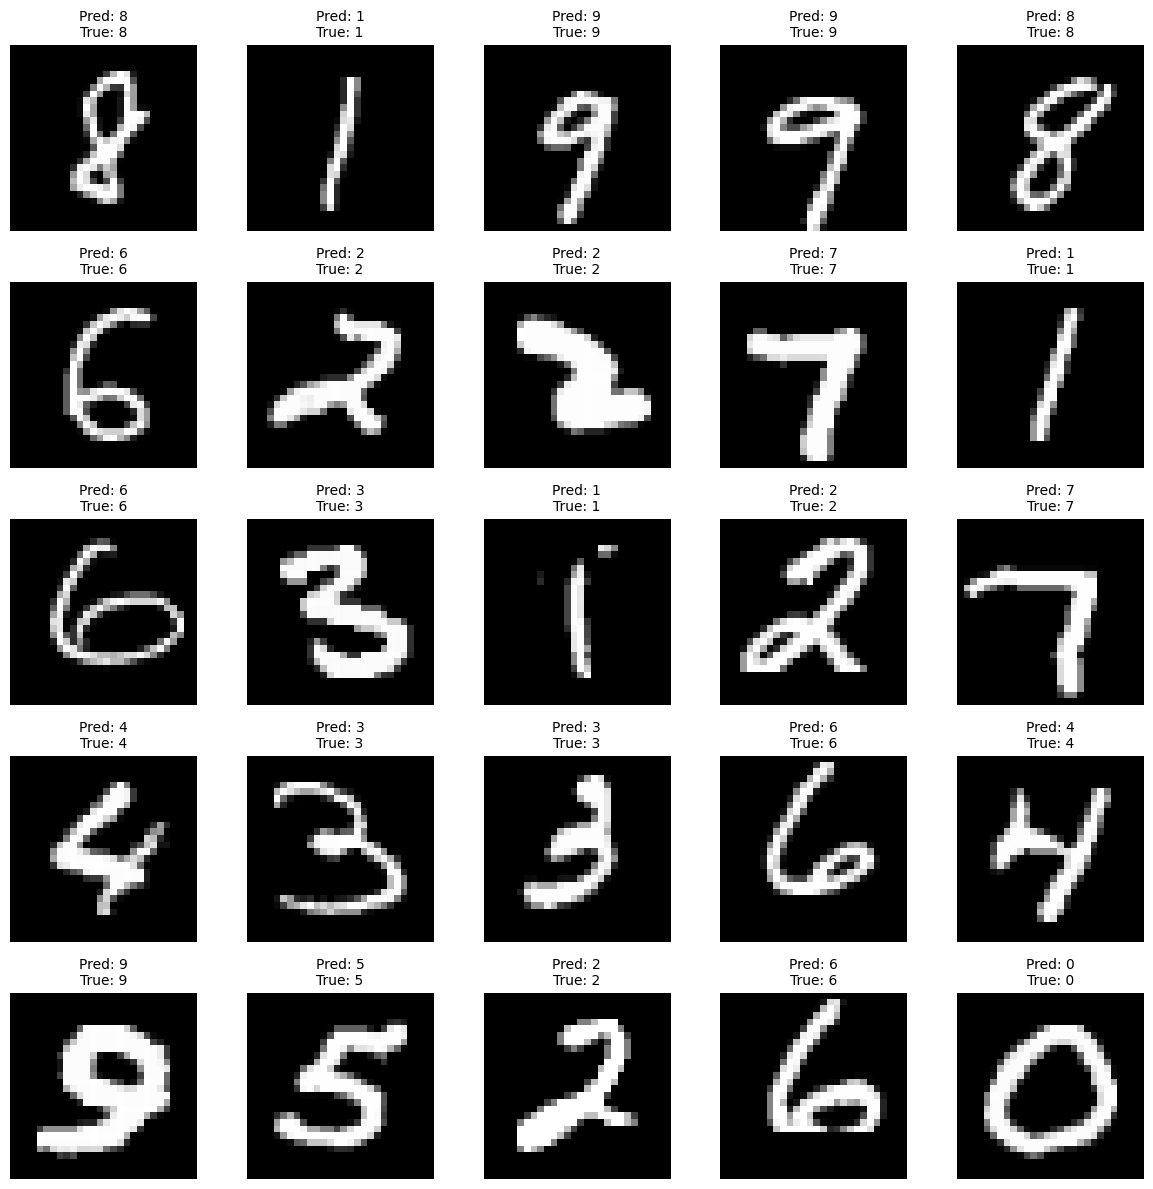

In [38]:
# Show 25 sample predictions
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_true[i]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
